In [5]:
import tensorflow as tf
import sys
sys.path.append('/nas/longleaf/home/siyangj/NiftyNet/')
import niftynet as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk

data_path = '/proj/NIRAL/users/siyangj/myData/min_normal/'
cut_path = '/proj/NIRAL/users/siyangj/myData/min_cut_outside/'
fill_path = '/proj/NIRAL/users/siyangj/myData/min_fill_outside/'


In [63]:
## Normalize each image
im_num = range(1,9)
for n in im_num:
    
    im_T1  = sitk.ReadImage(data_path+'T1/' +str(n)+'.nrrd')
    im_T2  = sitk.ReadImage(data_path+'T2/' +str(n)+'.nrrd')
    im_seg = sitk.ReadImage(data_path+'seg/'+str(n)+'.nrrd')
    
    im_len = im_T2.GetSize()
    
    for i in range(im_len[0]):
        for j in range(im_len[1]):
            for k in range(im_len[2]):
                if im_T1[i,j,k]>0 and im_T2[i,j,k]>0 and im_seg[i,j,k]==0:
                    im_seg[i,j,k] = 3
                    im_T1[i,j,k] = 0
                    im_T2[i,j,k] = 0
    sitk.WriteImage(im_T1, cut_path +'T1/' +str(n)+'.nrrd')
    sitk.WriteImage(im_T2, cut_path +'T2/' +str(n)+'.nrrd')
    sitk.WriteImage(im_seg,fill_path+'seg/'+str(n)+'.nrrd')

In [61]:
i = 3
im = sitk.ReadImage(data_path+'seg/' +str(i)+'.nrrd')
im.GetSize()

(96, 112, 96)

In [4]:
i=1;s='';

im_T1 = sitk.ReadImage(new_path+'T1/'+str(i)+s+'.nrrd')
im_T2 = sitk.ReadImage(new_path+'T2/'+str(i)+s+'.nrrd')
im_C  = sitk.Compose(im_T1,im_T2)

im_C.GetSize()

(120, 144, 136)

In [6]:
tar_dim = [120,144,136]

crop= [([0,0,0],[0,0,0]),
       ([0,0,0],[0,0,0]),
       ([2,8,36],[2,8,18]),
       ([2,0,54],[2,0,0]),
       ([2,20,44],[2,13,0]),
       ([2,17,50],[2,16,14]),
       ([2,17,44],[2,16,0]),
       ([2,17,50],[2,16,14])]

pad = [([0,2,3],[0,2,3]),
       ([0,2,3],[0,2,3]),
       ([0,0,0],[0,0,0]),
       ([0,2,0],[0,2,0]),
       ([0,0,0],[0,0,0]),
       ([0,0,0],[0,0,0]),
       ([0,0,0],[0,0,0]),
       ([0,0,0],[0,0,0])]

In [7]:
for i in np.arange(1,9):
    pad_l = pad[i-1][0]
    pad_u = pad[i-1][1]
    crop_l = crop[i-1][0]
    crop_u = crop[i-1][1]

    for s in suf1:
        for t,d in suf2.items():
            im_cur = sitk.ReadImage(data_path+str(i)+s+t+'.nrrd')
            ## Padding the image so that can be handled by 3D U-net
            im_pad = sitk.ConstantPad(im_cur,pad_l,pad_u,constant=0)
            im_crop = sitk.Crop(im_pad,crop_l,crop_u)
            sitk.WriteImage(im_crop,normal_path+d+str(i)+s+'.nrrd')

In [24]:
im_num = range(1,9)
for i in im_num:
    im_T1 = sitk.ReadImage(cut_path+'T1/'+str(i)+'.nrrd')
    im_T2 = sitk.ReadImage(cut_path+'T2/'+str(i)+'.nrrd')
    im_seg = sitk.ReadImage(cut_path+'seg/'+str(i)+'.nrrd')
    print(im_T1.GetSize(),im_T2.GetSize(),im_seg.GetSize(),im_T1.GetSpacing())
    im1_arr = sitk.GetArrayFromImage(im_T1)
    print((min(np.where(im1_arr>0)[0]),max(np.where(im1_arr>0)[0])))
    print((min(np.where(im1_arr>0)[1]),max(np.where(im1_arr>0)[1])))
    print((min(np.where(im1_arr>0)[2]),max(np.where(im1_arr>0)[2])))
    im_T1 = sitk.ReadImage(fill_path+'T1/'+str(i)+'.nrrd')
    im_T2 = sitk.ReadImage(fill_path+'T2/'+str(i)+'.nrrd')
    im_seg = sitk.ReadImage(fill_path+'seg/'+str(i)+'.nrrd')
    print(im_T1.GetSize(),im_T2.GetSize(),im_seg.GetSize(),im_T1.GetSpacing())
    im1_arr = sitk.GetArrayFromImage(im_T1)
    print((min(np.where(im1_arr>0)[0]),max(np.where(im1_arr>0)[0])))
    print((min(np.where(im1_arr>0)[1]),max(np.where(im1_arr>0)[1])))
    print((min(np.where(im1_arr>0)[2]),max(np.where(im1_arr>0)[2])))

(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(0, 95)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(0, 95)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(1, 94)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(1, 94)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(4, 91)
(0, 111)
(3, 92)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(4, 91)
(0, 111)
(3, 92)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(2, 92)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (1.0, 1.0, 1.0)
(0, 95)
(0, 111)
(2, 92)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (0.9999977350234985, 1.0, 0.9999999403953552)
(0, 95)
(0, 111)
(0, 95)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (0.9999977350234985, 1.0, 0.9999999403953552)
(0, 95)
(0, 111)
(0, 95)
(96, 112, 96) (96, 112, 96) (96, 112, 96) (0.9999988675117493, 0.9999995231628418, 0.9999998211860657)
(7, 92)

(96, 112, 96)
(96, 112, 96)


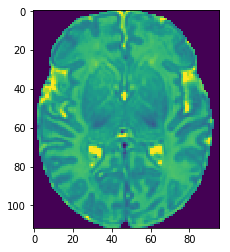

In [50]:
im1 = sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_fill_outside/T2/4.nrrd')
print(im1.GetSize())
arr1 = sitk.GetArrayFromImage(im1)
print(arr1.shape)
plt.imshow(arr1[50,:,:])

('ITK_InputFilterName', 'NRRD_kinds[0]', 'NRRD_kinds[1]', 'NRRD_kinds[2]', 'NRRD_space')
(96, 112, 96)
(96, 112, 96)


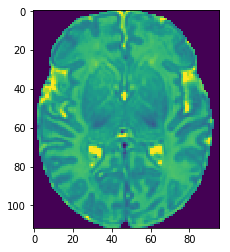

In [51]:
im2 = sitk.ReadImage('/proj/NIRAL/users/siyangj/myData/min_normal/T2/4.nrrd')
print(im2.GetMetaDataKeys())
print(im2.GetSize())
arr2 = sitk.GetArrayFromImage(im2)
print(arr2.shape)
plt.imshow(arr2[50,:,:])

In [52]:
ks = im.GetMetaDataKeys()
for k in ks:
    print(im.GetMetaData(k))

NrrdImageIO
domain
domain
domain
left-posterior-superior


In [57]:
im2.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)